# CNN with MNIST

## Install relevant libraries and import 

In [ ]:

pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot 
import matplotlib.pyplot as plt 
import numpy as np 
import visualkeras


## Load MNIST data 

In [ ]:
# loading MNIST dataset 

(X_train, y_train), (X_test,y_test) = load_data()



In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# reshaping the training and testing data 
# Reshape to add colour dimension (1)
# https://soutikc.medium.com/convolution-neural-networks-for-mnist-data-68807f662e7a 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2],1))

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2],1))


In [ ]:
# normalizing the values of pixels of images 
# normalize to make data between 0 & 1. This is easier for ML models to handle
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') /255.0 



Text(0.5, 1.0, '5')

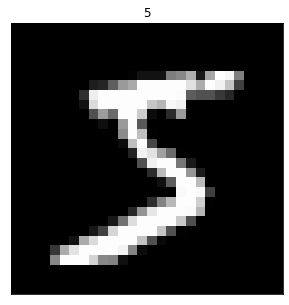

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1 , xticks=[], yticks=[])
ax.imshow(np.squeeze(X_train[0]), cmap='gray')
ax.set_title(y_train[0])

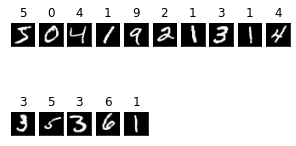

In [ ]:
fig = plt.figure(figsize = (5,3))
for i in range(15) :

  ax = fig.add_subplot(2,10,i+1 , xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
# determine the shape of the input images 
# This is the input shape into the neural network

img_shape = X_train.shape[1:]
print(img_shape)

(28, 28, 1)


## Build Machine Learning Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = img_shape ))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(500, activation ='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

## Visualize Neural Network

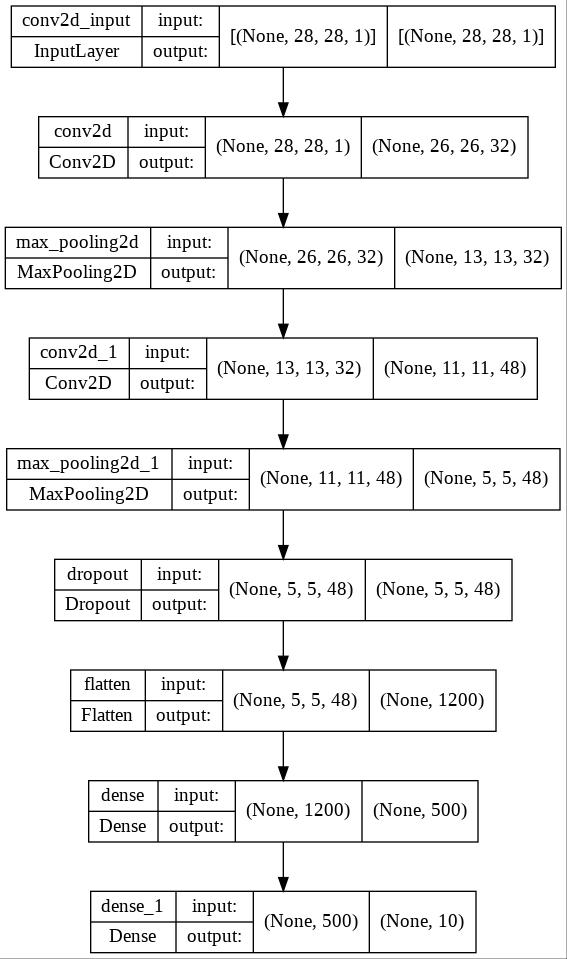

In [ ]:

plot_model(model, 'model.jpg', show_shapes=True)

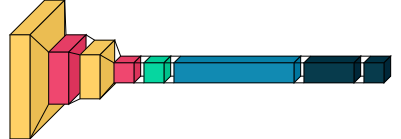

In [ ]:
visualkeras.layered_view(model) 



# Compile and build Neural Network

In [ ]:
# verbose - settings to view progress of epoch
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
conv_model = model.fit(X_train, y_train, epochs=10 , batch_size=128 , verbose=2 , validation_split=0.1)

Epoch 1/10
422/422 - 13s - loss: 0.2454 - accuracy: 0.9248 - val_loss: 0.0650 - val_accuracy: 0.9823 - 13s/epoch - 30ms/step
Epoch 2/10
422/422 - 2s - loss: 0.0870 - accuracy: 0.9724 - val_loss: 0.0443 - val_accuracy: 0.9878 - 2s/epoch - 4ms/step
Epoch 3/10
422/422 - 2s - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.0362 - val_accuracy: 0.9890 - 2s/epoch - 4ms/step
Epoch 4/10
422/422 - 2s - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.0298 - val_accuracy: 0.9917 - 2s/epoch - 4ms/step
Epoch 5/10
422/422 - 2s - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0321 - val_accuracy: 0.9918 - 2s/epoch - 4ms/step
Epoch 6/10
422/422 - 2s - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0270 - val_accuracy: 0.9930 - 2s/epoch - 4ms/step
Epoch 7/10
422/422 - 2s - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0270 - val_accuracy: 0.9927 - 2s/epoch - 4ms/step
Epoch 8/10
422/422 - 2s - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0283 - val_accuracy: 0.9917 - 2s/epoch - 4ms/step
Epoch 9/10
422/422 - 

## Testing Model

In [ ]:
loss , accuracy  = model.evaluate(X_test,y_test, verbose = 0)
print(f"Accuracy: {accuracy*100}")

Accuracy: 99.16999936103821


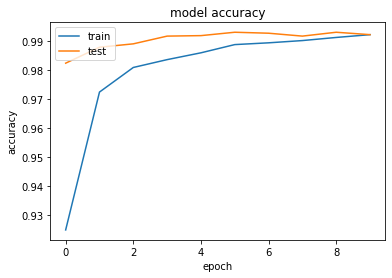

In [ ]:
plt.plot(conv_model .history['accuracy'])
plt.plot(conv_model .history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

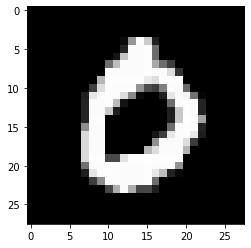

In [ ]:
test_image = X_test[3]

# display image 
plt.imshow(np.squeeze(test_image), cmap='gray')
plt.show()

In [ ]:
test_image.shape



(28, 28, 1)

In [ ]:
test_image = test_image.reshape(1,test_image.shape[0], test_image.shape[1], test_image.shape[2] )

In [ ]:

pred = model.predict(test_image)
print(f"Prediction: {argmax(pred)}")

Prediction: 0
